<img src='https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png' width="800">

# Basic timeseries manipulation

## Authors

Jordan Landers1

1 Department of Earth Sciences, University of Southern California

Author1 = {"name": "Jordan Landers", "affiliation": "Department of Earth Sciences, University of Southern
California", "email": "lplander@usc.edu", "orcid": "0000-0001-9772-7617"}

## Preamble

Pyleoclim has multiple functionalities to pre-process a timeseries including standardizing, detrending, interpolation. You can learn about the various pre-processing steps in Notebooks `.ipynb` and `ipynb`. Here, we simply standardize the data and plot it against the original data:

### Goals:

* Learn to specify a slice of a `Series`
* Learn to quickly view summary statistics of a `Series`
* Learn to standardize a `Series`
* Learn to gaussianize a `Series`


**Reading Time:**

5 minutes

### Keywords
Summary Statistics; Standardize; Gaussianize;

### Pre-requisites

None. This tutorial assumes basic knowledge of Python. If you are not familiar with this coding language, check out this tutorial: http://linked.earth/ec_workshops_py/.

### Relevant Packages

Pandas

## Data Description

Sea-surface temperature from [Kaplan (1998)](https://psl.noaa.gov/data/gridded/data.kaplan_sst.html) averaged over the NINO3 (5N-5S, 150W-190E)) region.


## Demonstration
### Load a sample dataset

In [1]:
import pyleoclim as pyleo
import pandas as pd

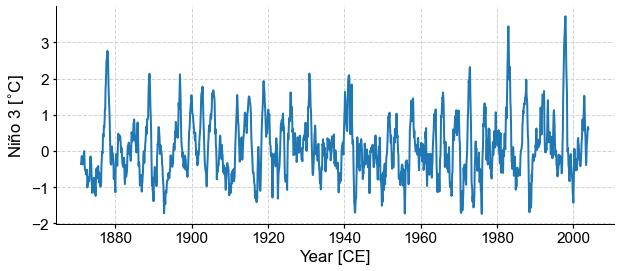

In [2]:
df = pd.read_csv('../data/wtc_test_data_nino_even.csv')
ts_nino = pyleo.Series(time =  df['t'], value = df['nino'],
                  time_name = 'Year', value_name = 'Niño 3',
                  time_unit = 'CE', value_unit = '$^{\circ}$C')

fig, ax = ts_nino.plot()

### Slicing
Passing a pair of dates to `.slice()` will return the time slice of interest.

In [3]:
ts_slice = ts_nino.slice([1972, 1998])

<AxesSubplot:xlabel='Year [CE]', ylabel='Niño 3 [$^{\\circ}$C]'>

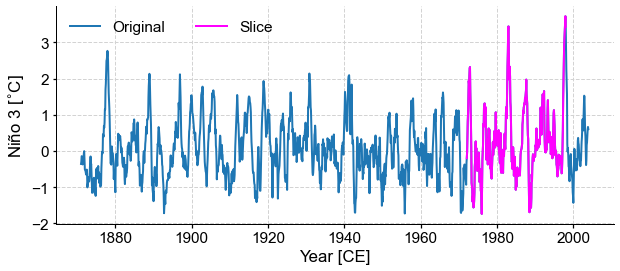

In [4]:
fig, ax = ts_nino.plot(label='Original',  lgd_kwargs={'ncol': 2}, zorder=99)
ts_slice.plot(label='Slice',  ax=ax, zorder=99, lgd_kwargs={'ncol': 2},**{'color':'magenta'})

### Stats
Calling `.stats()` will return a handy dictionary of summary statistics (mean, median, min, max, standard deviation,
IQR)

In [5]:
ts_nino.stats()

{'mean': 0.07816584993097744,
 'median': -0.022333334,
 'min': -1.739667,
 'max': 3.724903,
 'std': 0.8216852391761659,
 'IQR': 1.015916675}

### Standardizing
Calling `.standardize()` subtracts the mean of the series and divides by the standard deviation.

In [6]:
ts_nino_std = ts_nino.standardize()
ts_nino_std.stats()

{'mean': 2.6712132923312036e-17,
 'median': -0.12230861543982396,
 'min': -2.2123226306871038,
 'max': 4.4381193384042,
 'std': 1.0,
 'IQR': 1.2363817999439464}

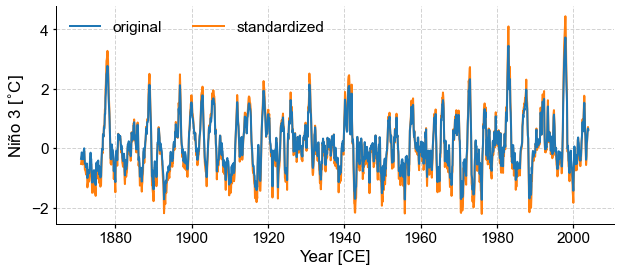

In [7]:
fig, ax = ts_nino.plot(label='original', zorder=99)
ax = ts_nino_std.plot(label='standardized', ax=ax, lgd_kwargs={'ncol': 2})

### Gaussianize
Calling `.gaussianize()` maps the series to a standard Gaussian distribution. Not only will it have  unit standard deviation ($\sigma=1$), a mean (and median) of 0, but its distribution is now the famed Bell Curve. 

In [8]:
ts_nino_gaus = ts_nino.gaussianize()
ts_nino_gaus.stats()

{'mean': 1.7808088615541357e-17,
 'median': 0.0,
 'min': -3.4198457991442184,
 'max': 3.4198457991442184,
 'std': 0.9995910124024004,
 'IQR': 1.347994295650057}

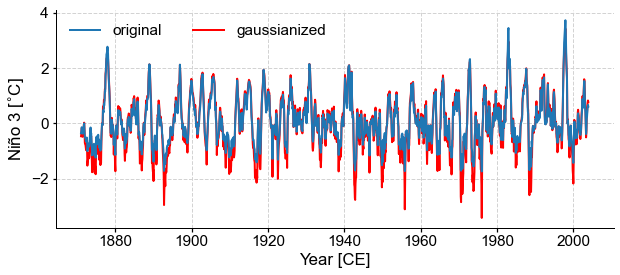

In [10]:
fig, ax = ts_nino.plot(label='original', zorder=99)
ax = ts_nino_gaus.plot(label='gaussianized', ax=ax, lgd_kwargs={'ncol': 2}, **{'color':'red'})

### Comparison
For context, it is interesting to compare the different treatments.

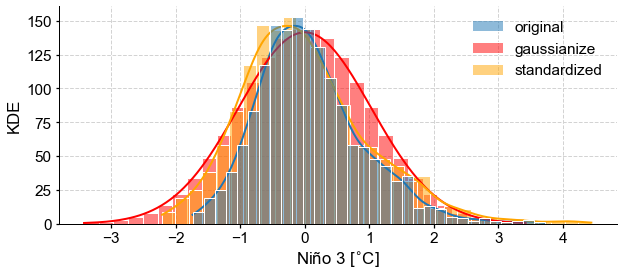

In [11]:
fig, ax = ts_nino.distplot(label='original', zorder=99)
ts_nino_gaus.distplot(label='gaussianized', ax=ax, **{'color':'red'})
ts_nino_std.distplot(label='standardized', ax=ax, **{'color':'orange'})
ax.legend()

JEG: the histograms make this hard to read ; I would show KDE only. 